In [3]:

!pip install d2l==1.0.0-beta0

import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from matplotlib import pyplot as plt

import torch
from torch import nn
from d2l import torch as d2l

!pip install ptflops
import ptflops
from ptflops import get_model_complexity_info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.6 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616822 sha256=41593cde46b0202a4868896a0a86d76ace80202dfd761b689b975bcb142ceea8
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninsta

In [4]:
def init_conv(module):
  if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)


In [5]:
#@d2l.add_to_class(d2l.Trainer)  
def __init__(self, max_epochs, num_gpus=1, gradient_clip_val=0):
        self.save_hyperparameters()
        self.traning_loss = []
        self.training_accuracy = []
        self.validation_loss = []
        self.validation_accuracy = []

        assert num_gpus == 1,'No GPU support yet'


In [6]:
@d2l.add_to_class(d2l.Classifier)  
def l_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)



In [7]:
#@d2l.add_to_class(d2l.Module)  
def ts(self, batch):
  l = self.loss(self(*batch[:-1]), batch[-1])
  self.plot('loss', l, train=True)
  self.traning_loss.append(l)
  return l



In [8]:
#@d2l.add_to_class(d2l.Module)  
def vs(self, batch):
  l = self.loss(self(*batch[:-1]), batch[-1])
  self.validation_loss.append(l)
  self.plot('loss', l, train=False)
     


In [9]:
#@d2l.add_to_class(d2l.Module)  
def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
            metric_type = 'train'
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
            metric_type = 'val'
        self.board.draw(x, d2l.numpy(d2l.to(value, d2l.cpu())),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))
        
        if not train and self.trainer.epoch % 1 == 0:
          traning_loss = self.trainer.traning_loss[-1]
          #training_accuracy = self.trainer.training_accuracy[-1]
          val_loss = self.trainer.validation_loss[-1]
          #val_acc = self.trainer.validation_accuracy[-1]
          print(f"Epoch [{self.trainer.epoch+1}/{self.trainer.epochs}]: "
                f"traning_loss = {traning_loss:.4f}, training_accuracy = {training_accuracy:.4f}, ")
               # f"val_loss = {val_loss:.4f}, val_acc = {val_acc:.4f}")
     


In [10]:
#@d2l.add_to_class(d2l.Trainer)  
def f(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.f_epoch()
            self.evaluate()


In [11]:
num_epochs = 10
trainer = d2l.Trainer(max_epochs=num_epochs, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
     


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



IN CLASS EXAMPLE

In [12]:
class A_LeNEt(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))
     


In [13]:
model = A_LeNEt()
model.l_summary((1, 1, 28, 28))


Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


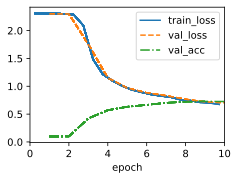

In [14]:
model = A_LeNEt(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_conv)
trainer.fit(model, data)



**Q1 Replacing the average pooling with max-pooling and changing the softmax layer with ReLU**

In [15]:
class A_LeNEt(d2l.Classifier):  
    """The modified LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(101), nn.Sigmoid(),
            nn.LazyLinear(80), nn.ReLU(),  # change Sigmoid to ReLU
            nn.LazyLinear(num_classes))


In [16]:
model = A_LeNEt()
model.layer_summary((1, 1, 28, 28))
     

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 101])
Sigmoid output shape:	 torch.Size([1, 101])
Linear output shape:	 torch.Size([1, 80])
ReLU output shape:	 torch.Size([1, 80])
Linear output shape:	 torch.Size([1, 10])


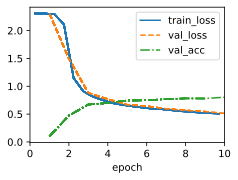

In [17]:

model = A_LeNEt(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_conv)
trainer.fit(model, data)

In [18]:
print('A_LeNEt:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))
     


A_LeNEt:
A_LeNEt(
  52.04 k, 100.000% Params, 419.76 KMac, 100.000% MACs, 
  (net): Sequential(
    52.04 k, 100.000% Params, 419.76 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.300% Params, 122.3 KMac, 29.137% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.121% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 4.642% Params, 241.6 KMac, 57.557% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.381% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(40.5 k, 77.822% Params, 40.5 KMac, 9.649% MACs, in_features=400, out_features=101, bias=True)
    (8): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )


**Q2 
a,b. Adjusting the convolution window size and output channels**

In [19]:
class A_LeNEt(d2l.Classifier):  
    """The modified LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=3, padding=1), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(101), nn.Sigmoid(),
            nn.LazyLinear(80), nn.ReLU(),  # change Sigmoid to ReLU
            nn.LazyLinear(num_classes))


In [20]:

model = A_LeNEt()
model.layer_summary((1, 1, 28, 28))
     

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 101])
Sigmoid output shape:	 torch.Size([1, 101])
Linear output shape:	 torch.Size([1, 80])
ReLU output shape:	 torch.Size([1, 80])
Linear output shape:	 torch.Size([1, 10])


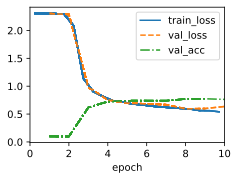

In [21]:
model = A_LeNEt(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_conv)
trainer.fit(model, data)


In [22]:

print('Complexity in this model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Complexity in this model:
A_LeNEt(
  51.95 k, 100.000% Params, 344.5 KMac, 100.000% MACs, 
  (net): Sequential(
    51.95 k, 100.000% Params, 344.5 KMac, 100.000% MACs, 
    (0): Conv2d(60, 0.116% Params, 47.04 KMac, 13.655% MACs, 1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.365% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 4.651% Params, 241.6 KMac, 70.132% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.464% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(40.5 k, 77.966% Params, 40.5 KMac, 11.757% MACs, in_features=400, out_features=101, bias=True)
    (8): Sigmoid(0, 0.000% Params, 0.0 Mac, 

**C. Adjust number of fully connected layers**

In [23]:

class n_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
                    nn.LazyConv2d(6, kernel_size=3, padding=1), nn.Sigmoid(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Flatten(),
                    nn.LazyLinear(121), nn.Sigmoid(),
                    nn.LazyLinear(80), nn.ReLU(),
                    nn.LazyLinear(64), nn.ReLU(),  # add another layer with 64 units
                    nn.LazyLinear(num_classes))


In [24]:
model = n_LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 121])
Sigmoid output shape:	 torch.Size([1, 121])
Linear output shape:	 torch.Size([1, 80])
ReLU output shape:	 torch.Size([1, 80])
Linear output shape:	 torch.Size([1, 64])
ReLU output shape:	 torch.Size([1, 64])
Linear output shape:	 torch.Size([1, 10])


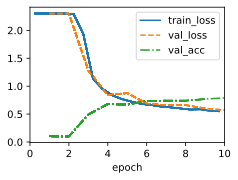

In [25]:

model =  n_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_conv)
trainer.fit(model, data)

In [26]:
print('Complexity in this model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Complexity in this model:
n_LeNet(
  66.59 k, 100.000% Params, 359.2 KMac, 100.000% MACs, 
  (net): Sequential(
    66.59 k, 100.000% Params, 359.2 KMac, 100.000% MACs, 
    (0): Conv2d(60, 0.090% Params, 47.04 KMac, 13.096% MACs, 1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.310% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.628% Params, 241.6 KMac, 67.260% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.445% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.52 k, 72.864% Params, 48.52 KMac, 13.508% MACs, in_features=400, out_features=121, bias=True)
    (8): Sigmoid(0, 0.000% Params, 0.0 Mac

**D. number of convolutional layers**

In [27]:
class n_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
                    nn.LazyConv2d(6, kernel_size=3, padding=1), nn.Sigmoid(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Flatten(),
                    nn.LazyLinear(121), nn.Sigmoid(),
                    nn.LazyLinear(256), nn.ReLU(),
                    nn.LazyLinear(120), nn.ReLU(),
                    nn.LazyLinear(num_classes))


In [28]:

model = n_LeNet()
model.layer_summary((1, 1, 24, 24))
     

Conv2d output shape:	 torch.Size([1, 6, 24, 24])
Sigmoid output shape:	 torch.Size([1, 6, 24, 24])
MaxPool2d output shape:	 torch.Size([1, 6, 12, 12])
Conv2d output shape:	 torch.Size([1, 16, 8, 8])
Sigmoid output shape:	 torch.Size([1, 16, 8, 8])
MaxPool2d output shape:	 torch.Size([1, 16, 4, 4])
Flatten output shape:	 torch.Size([1, 256])
Linear output shape:	 torch.Size([1, 121])
Sigmoid output shape:	 torch.Size([1, 121])
Linear output shape:	 torch.Size([1, 256])
ReLU output shape:	 torch.Size([1, 256])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 10])


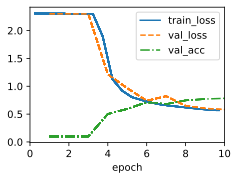

In [29]:

model = n_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_conv)
trainer.fit(model, data)


**E. different learning rates**

Complexity of the model:
lr_exp_drop_LeNet(
  61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
  (net): Sequential(
    61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.253% Params, 122.3 KMac, 28.061% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.079% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.079% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.915% Params, 241.6 KMac, 55.432% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.367% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.367% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 77.983% Params, 48.12 KMac, 11.040% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 12

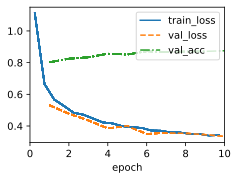

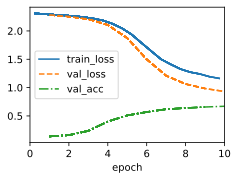

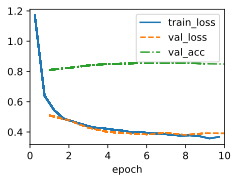

In [30]:
class lr_exp_drop_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(84), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(num_classes))


learning_rates = [0.1,0.001,0.5]
for lr_test in learning_rates:
  model = lr_exp_drop_LeNet(lr=lr_test)
  model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_conv)
  trainer.fit(model, data)
  print('Complexity of the model:')
  macs, params = get_model_complexity_info(model, (1, 28, 28))
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))


**Q3a. Adding Dropouts of 0.5 to problem 2a**

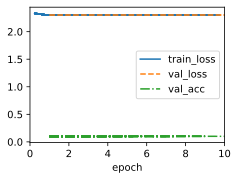

In [31]:
class Dropout_one(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
                    nn.LazyConv2d(6, kernel_size=3, padding=1), nn.Sigmoid(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Flatten(),
                    nn.LazyLinear(120), nn.Sigmoid(),
                    nn.Dropout(0.5),
                    nn.LazyLinear(120), nn.ReLU(),
                    nn.Dropout(0.5),
                    nn.LazyLinear(num_classes))
        
model = Dropout_one(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_conv)
trainer.fit(model, data)


as we can see the drop out .5 is giving graph at high. so we are reducing the dropout from .5 to .2 for better graph variation 

**Q3b. Adding Dropouts of 0.2 to problem 2b**

Complexity of the model:
Dropout_one(
  66.95 k, 100.000% Params, 441.09 KMac, 100.000% MACs, 
  (net): Sequential(
    66.95 k, 100.000% Params, 441.09 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.233% Params, 122.3 KMac, 27.728% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.066% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.066% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.609% Params, 241.6 KMac, 54.773% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.363% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.363% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 71.879% Params, 48.12 KMac, 10.909% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 120.0 Ma

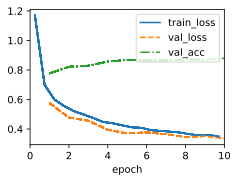

In [32]:
class Dropout_one(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(84), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(64),
            nn.Dropout(0.3),
            nn.LazyLinear(num_classes))
        
model = Dropout_one(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_conv)
trainer.fit(model, data)

print('Complexity of the model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

**Q3. Adding Dropouts of 0.2 to problem 2e**

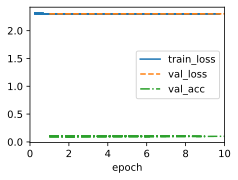

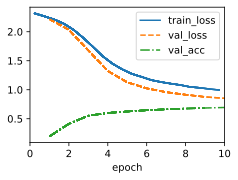

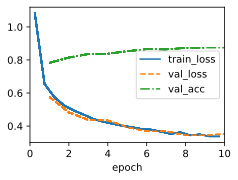

In [33]:
class lr_exp_drop_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5,), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.Dropout(0.2),
            nn.LazyLinear(84), nn.ReLU(),
            nn.Dropout(0.2),
            nn.LazyLinear(num_classes))


learning_rates = [0.5,0.001,0.1]
for lr_test in learning_rates:
  model = lr_exp_drop_LeNet(lr=lr_test)
  model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_conv)
  trainer.fit(model, data)


**Q4. Building AlexNet Model from Class example code**

In [34]:
data = d2l.FashionMNIST(batch_size=128, resize=(250, 250))

In [35]:

class Alex1(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [36]:

Alex1().layer_summary((1, 1, 264, 264))

Conv2d output shape:	 torch.Size([1, 96, 64, 64])
ReLU output shape:	 torch.Size([1, 96, 64, 64])
MaxPool2d output shape:	 torch.Size([1, 96, 31, 31])
Conv2d output shape:	 torch.Size([1, 256, 31, 31])
ReLU output shape:	 torch.Size([1, 256, 31, 31])
MaxPool2d output shape:	 torch.Size([1, 256, 15, 15])
Conv2d output shape:	 torch.Size([1, 384, 15, 15])
ReLU output shape:	 torch.Size([1, 384, 15, 15])
Conv2d output shape:	 torch.Size([1, 384, 15, 15])
ReLU output shape:	 torch.Size([1, 384, 15, 15])
Conv2d output shape:	 torch.Size([1, 256, 15, 15])
ReLU output shape:	 torch.Size([1, 256, 15, 15])
MaxPool2d output shape:	 torch.Size([1, 256, 7, 7])
Flatten output shape:	 torch.Size([1, 12544])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1

**RuntimeError: Given input size: (226x2x2). Calculated output size: (226x0x0). Output size is too small**
As we are facing size issues lets rsize the dataset

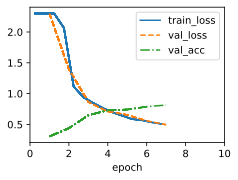

In [ ]:
model = Alex1(lr=0.01)
trainer.fit(model, data)
     
     